## Data Preprocessing of the Kaggle Dataset - Military Aircraft Detection

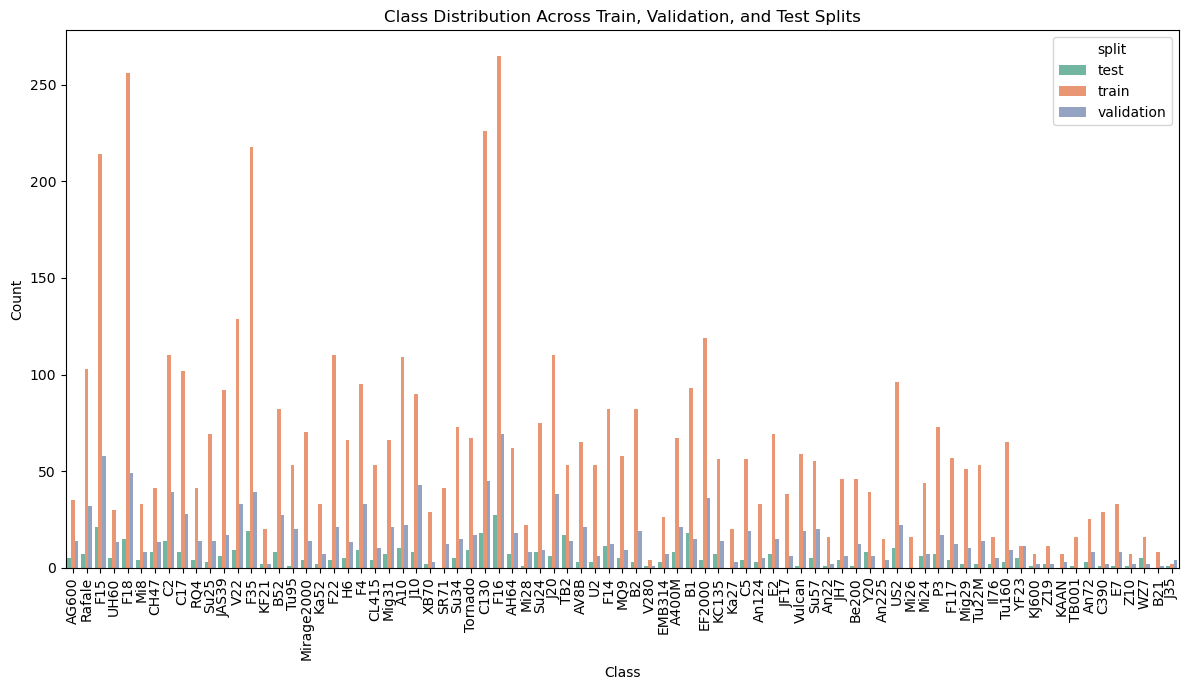

In [10]:
#Original Kaggle dataset split
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = '/Users/rishisengupta/Downloads/archive/labels_with_split.csv'
labels_df = pd.read_csv(file_path)

# Step 1: Create a smaller dataset using stratified sampling
subset_size = 0.2  # 20% of the dataset

# Stratified sampling to create a smaller dataset
df_subset, _ = train_test_split(labels_df, test_size=(1 - subset_size), stratify=labels_df['class'])

# Step 2: Split into train, validation, and test sets
# 70% train, 15% validation, and 15% test
train_df, temp_df = train_test_split(df_subset, test_size=0.3, stratify=df_subset['class'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['class'])

# Visualizing class distribution for train, validation, and test splits using Seaborn and Matplotlib

plt.figure(figsize=(12, 7))

# Combine all splits into a single DataFrame for visualization
labels_df_combined = pd.concat([train_df[['class', 'split']], valid_df[['class', 'split']], test_df[['class', 'split']]])

# Create a countplot to visualize the class distribution across the splits
sns.countplot(data=labels_df_combined, x='class', hue='split', palette='Set2')

# Customize the plot
plt.title('Class Distribution Across Train, Validation, and Test Splits')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

# Now you have 'train_df', 'valid_df', and 'test_df' DataFrames with balanced class distribution


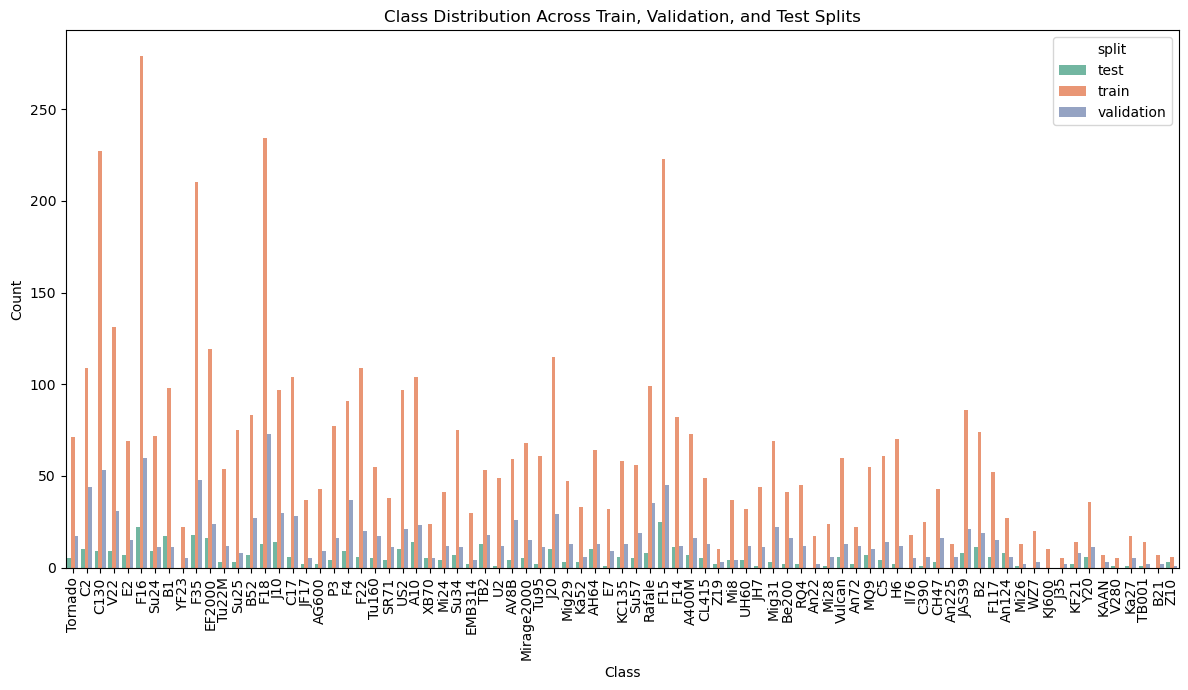

Images have been successfully moved to the corresponding directories.


In [12]:
#original Kaggle dataset split
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset with labels (CSV file)
file_path = '/Users/rishisengupta/Downloads/archive/labels_with_split.csv'
labels_df = pd.read_csv(file_path)

# Step 1: Create a smaller dataset using stratified sampling
subset_size = 0.2  # 20% of the dataset

# Stratified sampling to create a smaller dataset
df_subset, _ = train_test_split(labels_df, test_size=(1 - subset_size), stratify=labels_df['class'])

# Step 2: Split into train, validation, and test sets
# 70% train, 15% validation, and 15% test
train_df, temp_df = train_test_split(df_subset, test_size=0.3, stratify=df_subset['class'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['class'])

# Visualizing class distribution for train, validation, and test splits using Seaborn and Matplotlib
plt.figure(figsize=(12, 7))

# Combine all splits into a single DataFrame for visualization
labels_df_combined = pd.concat([train_df[['class', 'split']], valid_df[['class', 'split']], test_df[['class', 'split']]])

# Create a countplot to visualize the class distribution across the splits
sns.countplot(data=labels_df_combined, x='class', hue='split', palette='Set2')

# Customize the plot
plt.title('Class Distribution Across Train, Validation, and Test Splits')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

# Now we need to move images into the corresponding folders

# Define the base directory where images are stored and the directory where they will be moved
base_dir = '/Users/rishisengupta/Downloads/archive/dataset'  # Path where your .jpg images are stored
output_base_dir = '/Users/rishisengupta/Downloads/output_dataset'  # Where you want to store the new dataset

# Create the directory structure for train, val, and test
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base_dir, split), exist_ok=True)
    
    # For each class, create a folder within the split
    classes = labels_df['class'].unique()
    for class_name in classes:
        os.makedirs(os.path.join(output_base_dir, split, class_name), exist_ok=True)

# Function to move images based on split and class
def move_images(df, split, base_dir, output_base_dir):
    for _, row in df.iterrows():
        filename = row['filename']  # File name from the CSV
        class_name = row['class']   # Class name from the CSV
        image_path = os.path.join(base_dir, filename + '.jpg')  # Construct the full image path (.jpg extension)
        
        # Create destination directory for the class and split
        destination_dir = os.path.join(output_base_dir, split, class_name)
        
        # Check if the image exists and move it to the correct directory
        if os.path.exists(image_path):
            shutil.copy(image_path, destination_dir)  # Use shutil.move() if you want to move, not copy

# Move the images for each split (train, val, test)
move_images(train_df, 'train', base_dir, output_base_dir)
move_images(valid_df, 'val', base_dir, output_base_dir)
move_images(test_df, 'test', base_dir, output_base_dir)

print("Images have been successfully moved to the corresponding directories.")


In [62]:
#Roboflow dataset with resize 640x640 split using sklearn
import os
import shutil
import yaml
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the base directories for images and labels
base_image_dir = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/Dataset/images'  # Path where your .jpg images are stored
base_label_dir = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/Dataset/labels'  # Path where your YOLO label files are stored
output_base_dir = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/Dataset/output_yolov8_split'  # Where you want to store the new dataset

# Load the YOLO dataset YAML file
yolo_yaml_path = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/data.yaml'  # Path to your uploaded YAML file
with open(yolo_yaml_path, 'r') as yaml_file:
    yolo_data = yaml.safe_load(yaml_file)

# Extract class names from the YAML file
class_names = yolo_data['names']

# Step 1: Get all image and label files
def get_image_label_pairs(image_dir, label_dir):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):  # Assuming images are in .jpg format
            image_path = os.path.join(image_dir, filename)
            label_path = os.path.join(label_dir, filename.replace(".jpg", ".txt"))
            if os.path.exists(label_path):  # Ensure label exists for the image
                images.append(image_path)
                labels.append(label_path)
    return images, labels

# Load the image-label pairs from the image and label directories
images, labels = get_image_label_pairs(base_image_dir, base_label_dir)

# Step 2: Add class information from the labels (assuming class ID is in the YOLO label file)
# Extract class IDs from the label files (first value in each YOLO label file)
data = pd.DataFrame({
    'image': images,
    'label': labels
})

# Extract class IDs from the label files (first value in each YOLO label file)
data['class_id'] = data['label'].apply(lambda x: int(open(x).readline().split()[0]))  # Assuming first value is the class ID
data['class_name'] = data['class_id'].apply(lambda x: class_names[x])  # Map class ID to class name

# Step 3: Perform stratified split using scikit-learn's train_test_split
def stratified_split(images, labels, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    # Ensure that the sum of the ratios equals 1
    total = train_ratio + val_ratio + test_ratio
    if not (total == 1):
        print(f"Warning: The sum of ratios is {total}. Adjusting to make the sum equal to 1.")
        # Adjust the ratios proportionally to sum to 1
        train_ratio /= total
        val_ratio /= total
        test_ratio /= total
        print(f"Adjusted ratios: train={train_ratio}, val={val_ratio}, test={test_ratio}")
    
    # First, split into 70% train and 30% temp (which will be split into validation and test)
    train_data, temp_data = train_test_split(data, test_size=(1 - train_ratio), stratify=data['class_id'], random_state=42)
    
    # Then, split the 30% remaining into 20% validation and 10% test
    val_data, test_data = train_test_split(temp_data, test_size=(test_ratio / (test_ratio + val_ratio)), stratify=temp_data['class_id'], random_state=42)
    
    return train_data, val_data, test_data

# Perform stratified splits
train_data, val_data, test_data = stratified_split(images, labels)

# Step 4: Create output directories for each split (train, val, test)
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_base_dir, split, 'labels'), exist_ok=True)

# Step 5: Move the images and corresponding label files to their new directories
def move_files(data, split):
    for _, row in data.iterrows():
        image_path = row['image']
        label_path = row['label']
        
        # Move image
        shutil.copy(image_path, os.path.join(output_base_dir, split, 'images', os.path.basename(image_path)))
        
        # Move label
        shutil.copy(label_path, os.path.join(output_base_dir, split, 'labels', os.path.basename(label_path)))

# Move the files for each split
move_files(train_data, 'train')
move_files(val_data, 'val')
move_files(test_data, 'test')

print("Images and labels have been successfully moved to the corresponding directories.")


Adjusted ratios: train=0.7000000000000001, val=0.20000000000000004, test=0.10000000000000002
Images and labels have been successfully moved to the corresponding directories.


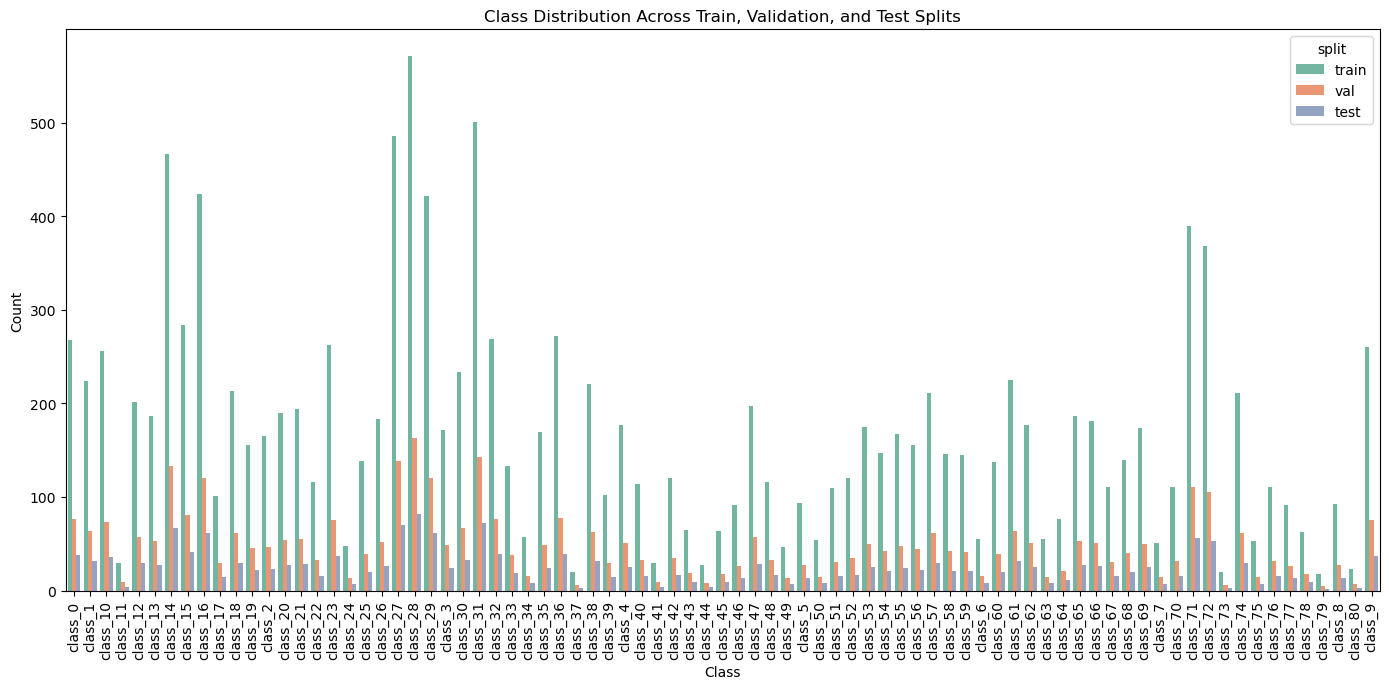

In [46]:
#split visualisation
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the output directory for the split dataset
output_base_dir = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/Dataset/output_yolov8_split'  # Where you want to store the new dataset

# Function to count the classes in a given split
def count_classes_in_split(split_dir):
    class_counts = []
    
    # Walk through the labels folder of the split
    label_dir = os.path.join(split_dir, 'labels')
    
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_dir, label_file)
            
            # Read the first line of the label file to get the class ID
            with open(label_path, 'r') as file:
                class_id = int(file.readline().split()[0])  # Assuming the first number in the label file is the class ID
                class_counts.append(class_id)
    
    return class_counts

# Count the classes for each split (train, val, test)
train_class_counts = count_classes_in_split(os.path.join(output_base_dir, 'train'))
val_class_counts = count_classes_in_split(os.path.join(output_base_dir, 'val'))
test_class_counts = count_classes_in_split(os.path.join(output_base_dir, 'test'))

# Create dataframes for plotting
train_df = pd.DataFrame({'class_id': train_class_counts, 'split': 'train'})
val_df = pd.DataFrame({'class_id': val_class_counts, 'split': 'val'})
test_df = pd.DataFrame({'class_id': test_class_counts, 'split': 'test'})

# Combine all splits into a single dataframe for easy plotting
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Map class_id to class_name using the names from the YOLO YAML file
class_names = ['class_{}'.format(i) for i in range(81)]  # Assuming there are 81 classes
combined_df['class_name'] = combined_df['class_id'].apply(lambda x: class_names[x])

# Plot the class distribution
plt.figure(figsize=(14, 7))
sns.countplot(data=combined_df, x='class_name', hue='split', palette='Set2', order=sorted(combined_df['class_name'].unique()))

# Customize the plot
plt.title('Class Distribution Across Train, Validation, and Test Splits')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


In [72]:
#Roboflow Split
import os
import shutil
import pandas as pd

# Define the output directory for the split dataset
output_base_dir = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection split_70_20_10.yolov8'  # Where you want to store the new dataset

# Function to count the classes in a given split
def count_classes_in_split(split_dir):
    class_counts = []
    
    # Walk through the labels folder of the split
    label_dir = os.path.join(split_dir, 'labels')
    
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_dir, label_file)
            
            # Read the first line of the label file to get the class ID
            with open(label_path, 'r') as file:
                class_id = int(file.readline().split()[0])  # Assuming the first number in the label file is the class ID
                class_counts.append(class_id)
    
    return class_counts

# Count the classes for each split (train, val, test)
train_class_counts = count_classes_in_split(os.path.join(output_base_dir, 'train'))
val_class_counts = count_classes_in_split(os.path.join(output_base_dir, 'val'))
test_class_counts = count_classes_in_split(os.path.join(output_base_dir, 'test'))

# Create dataframes for each split
train_df = pd.DataFrame({'class_id': train_class_counts, 'split': 'train'})
val_df = pd.DataFrame({'class_id': val_class_counts, 'split': 'val'})
test_df = pd.DataFrame({'class_id': test_class_counts, 'split': 'test'})

# Combine all splits into a single dataframe
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Map class_id to class_name using the class names from the YAML file
class_names = ['class_{}'.format(i) for i in range(81)]  # Assuming there are 81 classes
combined_df['class_name'] = combined_df['class_id'].apply(lambda x: class_names[x])

# Step 4: Create a table of class distribution across the splits
class_distribution_table = combined_df.groupby(['class_name', 'split']).size().unstack(fill_value=0)

# Ensure pandas displays the full DataFrame
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the class distribution table
class_distribution_table


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rishisengupta/Documents/git_AML/Aircraft Detection split_70_20_10.yolov8/val/labels'

In [74]:
#Sklearn Split on entire dataset
import os
import shutil
import pandas as pd

# Define the output directory for the split dataset
output_base_dir = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/Dataset/output_yolov8_split_variable'  # Where you want to store the new dataset

# Function to count the classes in a given split
def count_classes_in_split(split_dir):
    class_counts = []
    
    # Walk through the labels folder of the split
    label_dir = os.path.join(split_dir, 'labels')
    
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_dir, label_file)
            
            # Read the first line of the label file to get the class ID
            with open(label_path, 'r') as file:
                class_id = int(file.readline().split()[0])  # Assuming the first number in the label file is the class ID
                class_counts.append(class_id)
    
    return class_counts

# Count the classes for each split (train, val, test)
train_class_counts = count_classes_in_split(os.path.join(output_base_dir, 'train'))
val_class_counts = count_classes_in_split(os.path.join(output_base_dir, 'valid'))
test_class_counts = count_classes_in_split(os.path.join(output_base_dir, 'test'))

# Create dataframes for each split
train_df = pd.DataFrame({'class_id': train_class_counts, 'split': 'train'})
val_df = pd.DataFrame({'class_id': val_class_counts, 'split': 'valid'})
test_df = pd.DataFrame({'class_id': test_class_counts, 'split': 'test'})

# Combine all splits into a single dataframe
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Map class_id to class_name using the class names from the YAML file
class_names = ['class_{}'.format(i) for i in range(81)]  # Assuming there are 81 classes
combined_df['class_name'] = combined_df['class_id'].apply(lambda x: class_names[x])

# Step 4: Create a table of class distribution across the splits
class_distribution_table = combined_df.groupby(['class_name', 'split']).size().unstack(fill_value=0)

# Ensure pandas displays the full DataFrame
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the class distribution table
class_distribution_table


split,test,train,valid
class_name,,,
class_0,211,134,38
class_1,176,112,32
class_10,201,128,36
class_11,23,15,4
class_12,158,100,29
class_13,146,93,27
class_14,366,233,67
class_15,223,142,41
class_16,333,212,60


In [68]:
#custom split with user input,splited with 50%
import os
import shutil
import yaml
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the base directories for images and labels
base_image_dir = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/Dataset/images'  # Path where your .jpg images are stored
base_label_dir = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/Dataset/labels'  # Path where your YOLO label files are stored
output_base_dir = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/Dataset/output_yolov8_split_variable'  # Where you want to store the new dataset

# Load the YOLO dataset YAML file
yolo_yaml_path = '/Users/rishisengupta/Documents/git_AML/Aircraft Detection using Yolo.v1-dataset_with_resize_no_split.yolov8/data.yaml'  # Path to your uploaded YAML file
with open(yolo_yaml_path, 'r') as yaml_file:
    yolo_data = yaml.safe_load(yaml_file)

# Extract class names from the YAML file
class_names = yolo_data['names']

# Step 1: Get all image and label files
def get_image_label_pairs(image_dir, label_dir):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):  # Assuming images are in .jpg format
            image_path = os.path.join(image_dir, filename)
            label_path = os.path.join(label_dir, filename.replace(".jpg", ".txt"))
            if os.path.exists(label_path):  # Ensure label exists for the image
                images.append(image_path)
                labels.append(label_path)
    return images, labels

# Load the image-label pairs from the image and label directories
images, labels = get_image_label_pairs(base_image_dir, base_label_dir)

# Step 2: Add class information from the labels (assuming class ID is in the YOLO label file)
# Extract class IDs from the label files (first value in each YOLO label file)
data = pd.DataFrame({
    'image': images,
    'label': labels
})

# Extract class IDs from the label files (first value in each YOLO label file)
data['class_id'] = data['label'].apply(lambda x: int(open(x).readline().split()[0]))  # Assuming first value is the class ID
data['class_name'] = data['class_id'].apply(lambda x: class_names[x])  # Map class ID to class name

# Step 3: Ask the user to enter the desired total dataset split ratio
total_dataset_split = float(input("Enter the desired percentage of the dataset to split (e.g., 0.8 for 80%): "))

# Ensure the entered percentage is between 0 and 1
if not (0 < total_dataset_split < 1):
    raise ValueError("Please enter a value between 0 and 1.")

# Step 4: Maintain the approximate 70%, 20%, 10% splits
train_ratio = 0.7 * total_dataset_split  # Approximate 70% of the total dataset
val_ratio = 0.2 * total_dataset_split    # Approximate 20% of the total dataset
test_ratio = 1 - (train_ratio + val_ratio)  # Remaining for test set

# Check if the ratios add up to 1
if not (train_ratio + val_ratio + test_ratio == total_dataset_split):
    print(f"Warning: The sum of the ratios is {train_ratio + val_ratio + test_ratio}, adjusting the test ratio.")
    test_ratio = 1 - (train_ratio + val_ratio)  # Adjust the test ratio to make sure everything sums to the split

# Step 5: Perform stratified split using scikit-learn's train_test_split
def stratified_split(images, labels, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    # First, split into train and temp (which will be split into validation and test)
    train_data, temp_data = train_test_split(data, test_size=(1 - train_ratio), stratify=data['class_id'], random_state=42)
    
    # Then, split the remaining data into validation and test
    val_data, test_data = train_test_split(temp_data, test_size=(test_ratio / (test_ratio + val_ratio)), stratify=temp_data['class_id'], random_state=42)
    
    return train_data, val_data, test_data

# Perform stratified splits
train_data, val_data, test_data = stratified_split(images, labels, train_ratio=train_ratio, val_ratio=val_ratio, test_ratio=test_ratio)

# Step 6: Create output directories for each split (train, val, test)
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_base_dir, split, 'labels'), exist_ok=True)

# Step 7: Move the images and corresponding label files to their new directories
def move_files(data, split):
    for _, row in data.iterrows():
        image_path = row['image']
        label_path = row['label']
        
        # Move image
        shutil.copy(image_path, os.path.join(output_base_dir, split, 'images', os.path.basename(image_path)))
        
        # Move label
        shutil.copy(label_path, os.path.join(output_base_dir, split, 'labels', os.path.basename(label_path)))

# Move the files for each split
move_files(train_data, 'train')
move_files(val_data, 'val')
move_files(test_data, 'test')

print("Images and labels have been successfully moved to the corresponding directories.")


KeyboardInterrupt: Interrupted by user